In [10]:
#Import dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform (low=-90.000, high=90.000, size=2000)

lngs = np.random.uniform (low=-180.000, high=180.000, size=2000)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.

#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [12]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# Use the print() function to disply that latitude and longitude combinations.

#for coordinate in coordinates:
   # print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

757

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an endpoint URL for a city. End city is Boston
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed5f5dc8ded36d494c01c64333688d18&q=Boston


In [6]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [7]:
# Directly call the response code with the get() method using the status_code. Chain status_code
# to city_weather

city_weather.status_code

200

In [8]:
# Test out error response with 'Boston' spelled out as 'Bostn'

# Create an endpoint URL for a city.

city_url = url + "&q=" + "Bostn"

city_weather = requests.get(city_url)

city_weather

<Response [404]>

In [9]:
# Create an endpoint URL for a city - Boston

city_url = url + "&q=" + "Boston"

city_weather = requests.get(city_url)

city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.

city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":72.93,"feels_like":73.22,"temp_min":68.02,"temp_max":75.45,"pressure":1016,"humidity":70},"visibility":10000,"wind":{"speed":5.75,"deg":190},"clouds":{"all":100},"dt":1659337995,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1659346601,"sunset":1659398659},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Get the JSON text of the 'Get' request.

city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 72.93,
  'feels_like': 73.22,
  'temp_min': 68.02,
  'temp_max': 75.45,
  'pressure': 1016,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 190},
 'clouds': {'all': 100},
 'dt': 1659337995,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1659346601,
  'sunset': 1659398659},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

city_weather = requests.get(city_url)

if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City Weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [15]:
# Create an endpoint URL for a city.

city_url = url + "&q=" + "Boston"

city_weather = requests.get(city_url)

city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 72.88,
  'feels_like': 73.11,
  'temp_min': 67.66,
  'temp_max': 75.45,
  'pressure': 1016,
  'humidity': 69},
 'visibility': 10000,
 'wind': {'speed': 7, 'deg': 286, 'gust': 10},
 'clouds': {'all': 100},
 'dt': 1659338765,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1659346601,
  'sunset': 1659398659},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data - Boston

boston_data = city_weather.json()

In [18]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1659346601,
 'sunset': 1659398659}

In [19]:
boston_data["sys"]["country"]

'US'

In [20]:
boston_data["dt"]

1659338765

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 75.45 69 100 7


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 8, 1, 7, 26, 5)

In [23]:
# Change the datetime to a different format using Python string format

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-08-01 07:26:05'

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Build the basic URL for the OpenWeatherMap with API key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | flin flon
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | nenjiang
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | kuche
City not found. Skipping...
Processing Record 12 of Set 1 | marcona
City not found. Skipping...
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | necochea
Processing Record 16 of Set 1 | hovd
Processing Record 17 of Set 1 | ormond beach
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | il

Processing Record 38 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 4 | tezu
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | manali
Processing Record 43 of Set 4 | raudeberg
Processing Record 44 of Set 4 | cajati
Processing Record 45 of Set 4 | koslan
Processing Record 46 of Set 4 | tabou
Processing Record 47 of Set 4 | romitan
Processing Record 48 of Set 4 | dwarka
Processing Record 49 of Set 4 | bilma
Processing Record 50 of Set 4 | yashalta
Processing Record 1 of Set 5 | rancho palos verdes
Processing Record 2 of Set 5 | sibu
Processing Record 3 of Set 5 | buala
Processing Record 4 of Set 5 | pangody
Processing Record 5 of Set 5 | yakeshi
Processing Record 6 of Set 5 | chauk
Processing Record 7 of Set 5 | zharkent
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | mnogovershinnyy
Processing Record 10 of Set 5 | waddan
Processing Record 11 of Set 5 | molina
Pro

City not found. Skipping...
Processing Record 27 of Set 8 | bekhtery
Processing Record 28 of Set 8 | baykit
Processing Record 29 of Set 8 | tommot
Processing Record 30 of Set 8 | majenang
Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | dunedin
Processing Record 33 of Set 8 | mikhaylovskoye
Processing Record 34 of Set 8 | san cristobal
Processing Record 35 of Set 8 | ribeira grande
Processing Record 36 of Set 8 | leningradskiy
Processing Record 37 of Set 8 | liberia
Processing Record 38 of Set 8 | oussouye
Processing Record 39 of Set 8 | teya
Processing Record 40 of Set 8 | cienfuegos
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | rassvet
Processing Record 43 of Set 8 | clarksburg
Processing Record 44 of Set 8 | galle
Processing Record 45 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 8 | arrecife
Processing Record 47 of Set 8 | katangli
Processing Record 48 of Set 8 | kargasok
Processing Record 49 of Set 8 

Processing Record 13 of Set 12 | ouadda
Processing Record 14 of Set 12 | jalu
Processing Record 15 of Set 12 | ovalle
Processing Record 16 of Set 12 | tessalit
Processing Record 17 of Set 12 | pechenga
Processing Record 18 of Set 12 | hasilpur
Processing Record 19 of Set 12 | berlevag
Processing Record 20 of Set 12 | slyudyanka
Processing Record 21 of Set 12 | saint-georges
Processing Record 22 of Set 12 | juegang
Processing Record 23 of Set 12 | moche
Processing Record 24 of Set 12 | emba
Processing Record 25 of Set 12 | aflu
City not found. Skipping...
Processing Record 26 of Set 12 | kerman
Processing Record 27 of Set 12 | rockhampton
Processing Record 28 of Set 12 | ketchikan
Processing Record 29 of Set 12 | tarakan
Processing Record 30 of Set 12 | villazon
Processing Record 31 of Set 12 | abu kamal
Processing Record 32 of Set 12 | garowe
Processing Record 33 of Set 12 | mansoa
Processing Record 34 of Set 12 | salalah
Processing Record 35 of Set 12 | namatanai
Processing Record 36 

Processing Record 1 of Set 16 | puerto palomas
Processing Record 2 of Set 16 | makakilo city
Processing Record 3 of Set 16 | limbe
Processing Record 4 of Set 16 | puri
Processing Record 5 of Set 16 | port macquarie
Processing Record 6 of Set 16 | agirish
Processing Record 7 of Set 16 | kununurra
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,44.47,87,51,4.41,NZ,2022-08-03 05:31:35
1,Sao Filipe,14.8961,-24.4956,76.87,83,17,2.73,CV,2022-08-03 05:31:35
2,Hilo,19.7297,-155.0900,76.73,81,0,5.75,US,2022-08-03 05:31:35
3,Flin Flon,54.7682,-101.8650,52.36,86,99,9.93,CA,2022-08-03 05:31:36
4,Butaritari,3.0707,172.7902,81.21,79,44,13.38,KI,2022-08-03 05:31:36
5,Port Alfred,-33.5906,26.8910,66.20,55,16,5.46,ZA,2022-08-03 05:31:37
6,Nenjiang,49.1833,125.2167,85.89,53,15,4.74,CN,2022-08-03 05:31:37
7,Tuktoyaktuk,69.4541,-133.0374,51.80,87,75,11.50,CA,2022-08-03 05:31:38
8,Vaini,-21.2000,-175.2000,77.16,94,75,8.05,TO,2022-08-03 05:31:38
9,Bredasdorp,-34.5322,20.0403,48.72,89,13,3.87,ZA,2022-08-03 05:31:38


In [23]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-08-03 05:31:35,-46.1927,168.8643,44.47,87,51,4.41
1,Sao Filipe,CV,2022-08-03 05:31:35,14.8961,-24.4956,76.87,83,17,2.73
2,Hilo,US,2022-08-03 05:31:35,19.7297,-155.0900,76.73,81,0,5.75
3,Flin Flon,CA,2022-08-03 05:31:36,54.7682,-101.8650,52.36,86,99,9.93
4,Butaritari,KI,2022-08-03 05:31:36,3.0707,172.7902,81.21,79,44,13.38
5,Port Alfred,ZA,2022-08-03 05:31:37,-33.5906,26.8910,66.20,55,16,5.46
6,Nenjiang,CN,2022-08-03 05:31:37,49.1833,125.2167,85.89,53,15,4.74
7,Tuktoyaktuk,CA,2022-08-03 05:31:38,69.4541,-133.0374,51.80,87,75,11.50
8,Vaini,TO,2022-08-03 05:31:38,-21.2000,-175.2000,77.16,94,75,8.05
9,Bredasdorp,ZA,2022-08-03 05:31:38,-34.5322,20.0403,48.72,89,13,3.87


In [25]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module

import time

# Get today's date in seconds.
today = time.time()

today

1659507109.3169873

In [29]:
# Convert the time using the string method

today = time.strftime("%x")

today

'08/02/22'

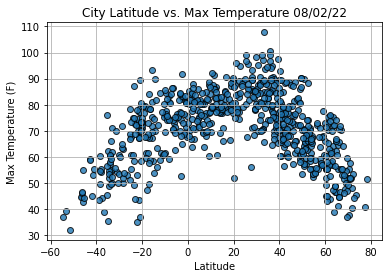

In [30]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " +time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

#Save the figure.
plt.savefig("weather_data.Fig1.png")

# Show plot.
plt.show()

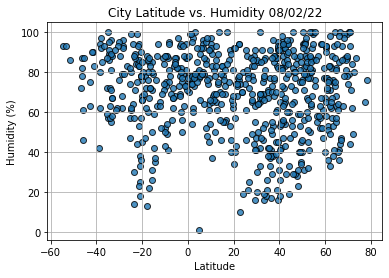

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

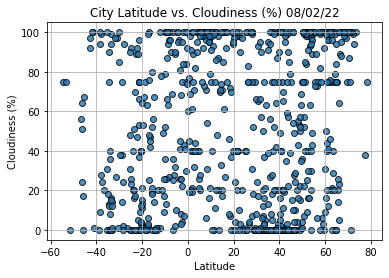

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

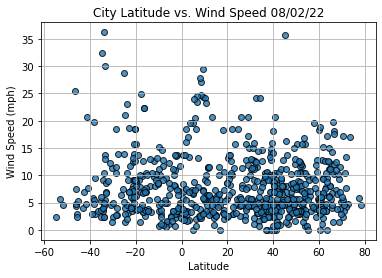

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()